In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
pwd

'C:\\Users\\HP'

In [3]:
df=pd.read_excel(r'C:\\Users\\HP\Downloads\archive (10)\finalDataset0.2.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             185 non-null    int64  
 1   teaching.1           185 non-null    object 
 2   coursecontent        184 non-null    float64
 3   coursecontent.1      185 non-null    object 
 4   examination          184 non-null    float64
 5   Examination          185 non-null    object 
 6   labwork              185 non-null    int64  
 7   labwork.1            185 non-null    object 
 8   library_facilities   182 non-null    float64
 9    library_facilities  185 non-null    object 
 10  extracurricular      185 non-null    int64  
 11  extracurricular.1    185 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 17.5+ KB


In [4]:
df.head()

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [5]:
df['teaching.1'][0]

'teacher are punctual but they should also give us the some practical knowledge other than theortical'

In [6]:
#creating a new dataframe from the main dataframe, because i notice the cnservation are diffferent

df_teach=df.loc[:,['teaching','teaching.1']]

df_teach

,teaching,teaching.1
0,0,teacher are punctual but they should also give...
1,1,Good
2,1,Excellent lectures are delivered by teachers a...
3,1,Good
4,1,teachers give us all the information required ...
...,...,...
180,1,intraction is good and leacture delivery also ...
181,1,all the given terms are good regarding the uni...
182,1,All the terms are good regarding the universit...
183,-1,Some of the teacher are un experienced. Also t...


In [7]:
' '.join(df_teach['teaching.1'])

"teacher are punctual but they should also give us the some practical knowledge other than theortical Good  Excellent lectures are delivered by teachers and all teachers are very punctual. Good teachers give us all the information required to improve the performance. Yes good and punctual It is good Good Good It's good when compare with my Btech lectures and teaching activities. Good way of teaching is good University teaching here is very much dependent upon slides,though it is a easy way of teaching but still leaving some concepts unclear..otherwise interaction with the faculty is good.Lecture delivery sometimes is not upto the mark and punctuality is  fine.  Good Good  As compared to other colleges and university our university is perfect in all the aspects Good Lectures helps in clear our concept Talk about punctuality, it's really good but the lecture delivery is somehow not appreciated because every teacher has different style of teaching, so lack of knowledge in terms of subject

In [8]:
#data cleaning
#importing the necessary librry for dt cleaning

import nltk
from nltk.stem import WordNetLemmatizer

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [9]:
lemmetizer=WordNetLemmatizer()
import string

In [10]:
#Data Clening by taking off the numeric

df_teach['Text']=df_teach['teaching.1'].str.replace('\d+', '')

C:\Users\HP\AppData\Local\Temp\ipykernel_33832\681874788.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_teach['Text']=df_teach['teaching.1'].str.replace('\d+', '')


In [11]:
import re

def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text  
        
df_teach['Text']=df_teach['Text'].apply(preprocessor)

In [12]:
df_teach

,teaching,teaching.1,Text
0,0,teacher are punctual but they should also give...,teacher are punctual but they should also give...
1,1,Good,good
2,1,Excellent lectures are delivered by teachers a...,excellent lectures are delivered by teachers a...
3,1,Good,good
4,1,teachers give us all the information required ...,teachers give us all the information required ...
...,...,...,...
180,1,intraction is good and leacture delivery also ...,intraction is good and leacture delivery also ...
181,1,all the given terms are good regarding the uni...,all the given terms are good regarding the uni...
182,1,All the terms are good regarding the universit...,all the terms are good regarding the universit...
183,-1,Some of the teacher are un experienced. Also t...,some of the teacher are un experienced also th...


In [13]:
import string

In [14]:
df_teach['Text']=df_teach['Text'].apply(lambda X: ' '.join([lemmetizer.lemmatize(i) for i in X.split()]))
df_teach['Text']=df_teach['Text'].apply(lambda X: X.translate(str.maketrans(' ',' ',string.punctuation)))

In [15]:
' '.join(df_teach['Text'])

'teacher are punctual but they should also give u the some practical knowledge other than theortical good excellent lecture are delivered by teacher and all teacher are very punctual good teacher give u all the information required to improve the performance yes good and punctual it is good good good it s good when compare with my btech lecture and teaching activity good way of teaching is good university teaching here is very much dependent upon slide though it is a easy way of teaching but still leaving some concept unclear otherwise interaction with the faculty is good lecture delivery sometimes is not upto the mark and punctuality is fine good good a compared to other college and university our university is perfect in all the aspect good lecture help in clear our concept talk about punctuality it s really good but the lecture delivery is somehow not appreciated because every teacher ha different style of teaching so lack of knowledge in term of subject is there and interaction is 

In [16]:
df_teach.head()

,teaching,teaching.1,Text
0,0,teacher are punctual but they should also give...,teacher are punctual but they should also give...
1,1,Good,good
2,1,Excellent lectures are delivered by teachers a...,excellent lecture are delivered by teacher and...
3,1,Good,good
4,1,teachers give us all the information required ...,teacher give u all the information required to...


In [17]:
df_teach=df_teach.reset_index()

In [19]:
df_teach.columns=['id','teching','teaching.01','Text']

In [20]:
df_teach

,id,teching,teaching.01,Text
0,0,0,teacher are punctual but they should also give...,teacher are punctual but they should also give...
1,1,1,Good,good
2,2,1,Excellent lectures are delivered by teachers a...,excellent lecture are delivered by teacher and...
3,3,1,Good,good
4,4,1,teachers give us all the information required ...,teacher give u all the information required to...
...,...,...,...,...
180,180,1,intraction is good and leacture delivery also ...,intraction is good and leacture delivery also ...
181,181,1,all the given terms are good regarding the uni...,all the given term are good regarding the univ...
182,182,1,All the terms are good regarding the universit...,all the term are good regarding the university...
183,183,-1,Some of the teacher are un experienced. Also t...,some of the teacher are un experienced also th...


Carrying Out Sentimental Analysis:

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [22]:
sia=SentimentIntensityAnalyzer()

In [23]:
sample=df_teach['Text'][0]

sample

'teacher are punctual but they should also give u the some practical knowledge other than theortical'

In [24]:
sia.polarity_scores(sample)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [25]:
data={}

for i, row in tqdm(df_teach.iterrows(),total=len(df_teach)):
    text=row['Text']
    my_index=row['id']
    data[my_index]=sia.polarity_scores(text)

  0%|          | 0/185 [00:00<?, ?it/s]

In [26]:
vaders=pd.DataFrame(data).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df_teach,how='left')

In [27]:
vaders

,id,neg,neu,pos,compound,teching,teaching.01,Text
0,0,0.000,1.000,0.000,0.0000,0,teacher are punctual but they should also give...,teacher are punctual but they should also give...
1,1,0.000,0.000,1.000,0.4404,1,Good,good
2,2,0.000,0.748,0.252,0.5719,1,Excellent lectures are delivered by teachers a...,excellent lecture are delivered by teacher and...
3,3,0.000,0.000,1.000,0.4404,1,Good,good
4,4,0.000,0.756,0.244,0.4404,1,teachers give us all the information required ...,teacher give u all the information required to...
...,...,...,...,...,...,...,...,...
180,180,0.000,0.580,0.420,0.8271,1,intraction is good and leacture delivery also ...,intraction is good and leacture delivery also ...
181,181,0.000,0.734,0.266,0.4404,1,all the given terms are good regarding the uni...,all the given term are good regarding the univ...
182,182,0.000,0.734,0.266,0.4404,1,All the terms are good regarding the universit...,all the term are good regarding the university...
183,183,0.175,0.825,0.000,-0.6486,-1,Some of the teacher are un experienced. Also t...,some of the teacher are un experienced also th...


In [28]:
vaders['teaching.01'][183]

'Some of the teacher are un experienced. Also they are unfair and baised. Infact many of the teachers are having few or no experience about the subject '

In [29]:
vaders['teaching.01'][0]

'teacher are punctual but they should also give us the some practical knowledge other than theortical'

In [30]:
vaders['teaching.01'][1]

'Good '

In [31]:
df_teach['teching'].value_counts()

 1    137
 0     35
-1     13
Name: teching, dtype: int64

In [32]:
df_teach['teaching']=df_teach['teching'].map({1:'Positive',0:'Neutral',-1:'Negative'})

In [33]:
df_teach

,id,teching,teaching.01,Text,teaching
0,0,0,teacher are punctual but they should also give...,teacher are punctual but they should also give...,Neutral
1,1,1,Good,good,Positive
2,2,1,Excellent lectures are delivered by teachers a...,excellent lecture are delivered by teacher and...,Positive
3,3,1,Good,good,Positive
4,4,1,teachers give us all the information required ...,teacher give u all the information required to...,Positive
...,...,...,...,...,...
180,180,1,intraction is good and leacture delivery also ...,intraction is good and leacture delivery also ...,Positive
181,181,1,all the given terms are good regarding the uni...,all the given term are good regarding the univ...,Positive
182,182,1,All the terms are good regarding the universit...,all the term are good regarding the university...,Positive
183,183,-1,Some of the teacher are un experienced. Also t...,some of the teacher are un experienced also th...,Negative


<AxesSubplot:title={'center':'Sentimental Analysis'}>

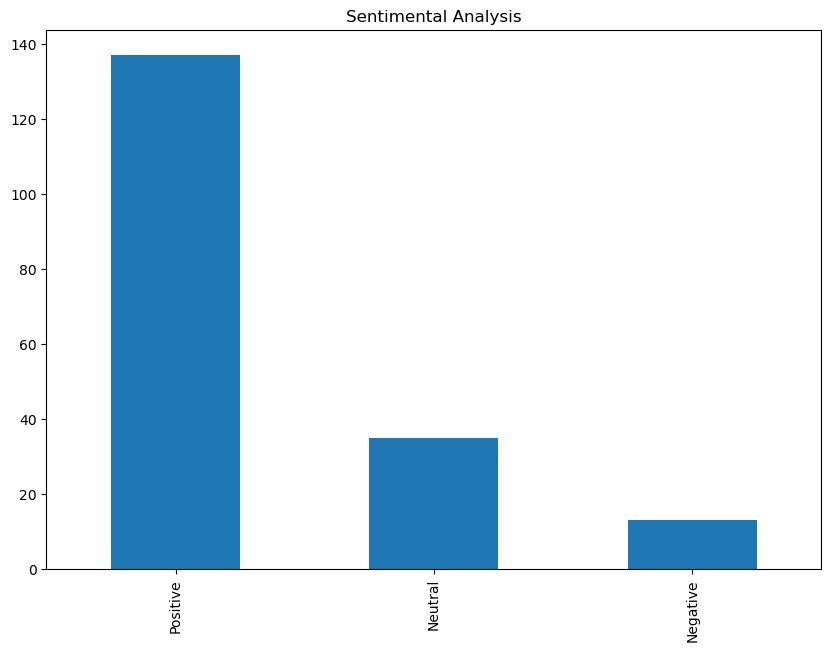

In [34]:
df_teach['teaching'].value_counts().plot.bar(figsize=(10,7),title='Sentimental Analysis')

In [35]:
df.head()

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [52]:
df_cons=df.loc[:,['coursecontent','coursecontent.1']]

df_cons

,coursecontent,coursecontent.1
0,0.0,content of courses are average
1,-1.0,Not good
2,1.0,All courses material provide very good knowled...
3,-1.0,Content of course is perfectly in line with th...
4,1.0,content of courses improves my knowledge
...,...,...
180,0.0,every one can tell depth of course but some on...
181,1.0,we are getting maximum knowledge
182,1.0,Knowledge is maximum gained by reading books ...
183,0.0,Its fine but it should focus more towards prac...


In [53]:
textin=' '.join(df_cons['coursecontent.1'])

textin

"content of courses are average Not good All courses material provide very good knowledge in depth . Content of course is perfectly in line with the teaching philosophy that is being perpetuated here i.e cramming,rote learning. content of courses improves my knowledge Yes Good This semester university has provide best teachers  Needs some improvement Needs some improvement Knowledge  and depth of the course  is good but while coming to the material it's not upto the mark. Knowledge,depth of course is good but course material are not upto the mark course content is knowledgeable  Content of the courses is good but some courses need improvement. Course material is not upto the mark.  Good Very good Material of the course is not good enough  sometimes proper course material is not required. Easily available course material with sufficient knowledge gaining The materials or links provided for study purpose is good, clarity in depth of courses but again it differs from teacher to teacher. T

In [54]:
import re

def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text  
        
df_cons['Text']=df_cons['coursecontent.1'].apply(preprocessor)

In [55]:
df_cons

,coursecontent,coursecontent.1,Text
0,0.0,content of courses are average,content of courses are average
1,-1.0,Not good,not good
2,1.0,All courses material provide very good knowled...,all courses material provide very good knowled...
3,-1.0,Content of course is perfectly in line with th...,content of course is perfectly in line with th...
4,1.0,content of courses improves my knowledge,content of courses improves my knowledge
...,...,...,...
180,0.0,every one can tell depth of course but some on...,every one can tell depth of course but some on...
181,1.0,we are getting maximum knowledge,we are getting maximum knowledge
182,1.0,Knowledge is maximum gained by reading books ...,knowledge is maximum gained by reading books a...
183,0.0,Its fine but it should focus more towards prac...,its fine but it should focus more towards prac...


In [56]:
df_cons['Text']=df_cons['Text'].apply(lambda X: X.translate(str.maketrans(' ',' ',string.punctuation)))
df_cons['Text']=df_cons['Text'].apply(lambda X: ' '.join([lemmetizer.lemmatize(i) for i in X.split()]))

In [57]:
samplin=' '.join(df_cons['Text'])

samplin

'content of course are average not good all course material provide very good knowledge in depth content of course is perfectly in line with the teaching philosophy that is being perpetuated here i e cramming rote learning content of course improves my knowledge yes good this semester university ha provide best teacher need some improvement need some improvement knowledge and depth of the course is good but while coming to the material it s not upto the mark knowledge depth of course is good but course material are not upto the mark course content is knowledgeable content of the course is good but some course need improvement course material is not upto the mark good very good material of the course is not good enough sometimes proper course material is not required easily available course material with sufficient knowledge gaining the material or link provided for study purpose is good clarity in depth of course but again it differs from teacher to teacher the course note are very kno

In [58]:
df_cons

,coursecontent,coursecontent.1,Text
0,0.0,content of courses are average,content of course are average
1,-1.0,Not good,not good
2,1.0,All courses material provide very good knowled...,all course material provide very good knowledg...
3,-1.0,Content of course is perfectly in line with th...,content of course is perfectly in line with th...
4,1.0,content of courses improves my knowledge,content of course improves my knowledge
...,...,...,...
180,0.0,every one can tell depth of course but some on...,every one can tell depth of course but some on...
181,1.0,we are getting maximum knowledge,we are getting maximum knowledge
182,1.0,Knowledge is maximum gained by reading books ...,knowledge is maximum gained by reading book an...
183,0.0,Its fine but it should focus more towards prac...,it fine but it should focus more towards pract...


In [59]:
sampling=df_cons['Text'][0]

sia.polarity_scores(sampling)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [60]:
samplingg=df_cons['Text'][1]

samplingg

'not good'

In [63]:
df_cons=df_cons.reset_index().rename(columns={'index':'id'})

df_cons

,id,coursecontent,coursecontent.1,Text
0,0,0.0,content of courses are average,content of course are average
1,1,-1.0,Not good,not good
2,2,1.0,All courses material provide very good knowled...,all course material provide very good knowledg...
3,3,-1.0,Content of course is perfectly in line with th...,content of course is perfectly in line with th...
4,4,1.0,content of courses improves my knowledge,content of course improves my knowledge
...,...,...,...,...
180,180,0.0,every one can tell depth of course but some on...,every one can tell depth of course but some on...
181,181,1.0,we are getting maximum knowledge,we are getting maximum knowledge
182,182,1.0,Knowledge is maximum gained by reading books ...,knowledge is maximum gained by reading book an...
183,183,0.0,Its fine but it should focus more towards prac...,it fine but it should focus more towards pract...


In [64]:
data={}

for i, row in tqdm(df_cons.iterrows(),total=len(df_cons)):
    text=row['Text']
    my_index=row['id']
    data[my_index]=sia.polarity_scores(text)

  0%|          | 0/185 [00:00<?, ?it/s]

In [69]:
vaders=pd.DataFrame(data).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df_cons,how='left')

In [70]:
vaders

,id,neg,neu,pos,compound,coursecontent,coursecontent.1,Text
0,0,0.000,1.000,0.000,0.0000,0.0,content of courses are average,content of course are average
1,1,0.706,0.294,0.000,-0.3412,-1.0,Not good,not good
2,2,0.000,0.715,0.285,0.4927,1.0,All courses material provide very good knowled...,all course material provide very good knowledg...
3,3,0.000,0.811,0.189,0.6369,-1.0,Content of course is perfectly in line with th...,content of course is perfectly in line with th...
4,4,0.000,0.641,0.359,0.4215,1.0,content of courses improves my knowledge,content of course improves my knowledge
...,...,...,...,...,...,...,...,...
180,180,0.000,1.000,0.000,0.0000,0.0,every one can tell depth of course but some on...,every one can tell depth of course but some on...
181,181,0.000,1.000,0.000,0.0000,1.0,we are getting maximum knowledge,we are getting maximum knowledge
182,182,0.000,0.843,0.157,0.3818,1.0,Knowledge is maximum gained by reading books ...,knowledge is maximum gained by reading book an...
183,183,0.000,0.769,0.231,0.6249,0.0,Its fine but it should focus more towards prac...,it fine but it should focus more towards pract...


In [71]:
vaders['Text'][183]

'it fine but it should focus more towards practical knowledge rather than content based it would be helpful for u'

In [72]:
vaders['Text'][3]

'content of course is perfectly in line with the teaching philosophy that is being perpetuated here i e cramming rote learning'

In [80]:
df_cons['Scores']=df_cons['coursecontent'].map({0:'Neutral',1:'Postive',-1:'Negative'})

<AxesSubplot:>

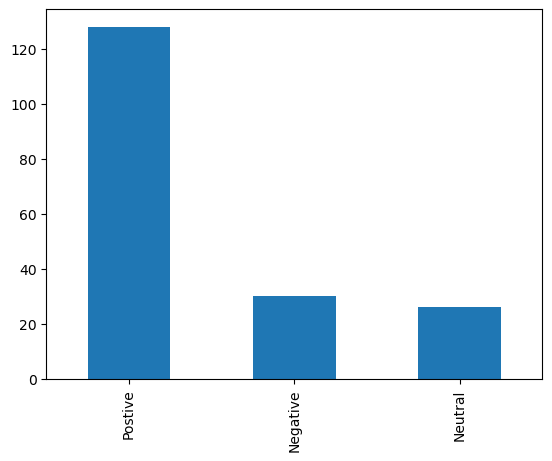

In [82]:
df_cons['Scores'].value_counts().plot.bar()

In [83]:
df.head()

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [84]:
df_exam=df.loc[:,['examination','Examination']]

df_exam

,examination,Examination
0,1.0,examination pattern is good
1,1.0,Good
2,1.0,Exam pattern is up to the mark and the Cgpa de...
3,-1.0,Again the university tests students of their a...
4,1.0,examination pattern is good
...,...,...
180,NaN,exam pattern is good and marks distribution is...
181,1.0,all are good
182,0.0,The examination pattern is good .But time is n...
183,1.0,MCQ pattern is quite good and efficient way fo...


In [86]:
sample=' '.join(df_exam['Examination'])

In [88]:
len(sample.split('.'))

70

In [89]:
sample

"examination pattern is good Good Exam pattern is up to the mark and the Cgpa depends on the various marks distributions like ca, mte etc which is very nice as compare to other institutions. Paper checking does not depend on length of ques but on the material which is the best part of it. Again the university tests students of their ability to memorize stuff. Questions should emphasize more on concepts rather than testing brain's cramming storage house. examination pattern is good Yes Good I like the question pattern Good Good This university is far better than other university when coming to the exam pattern,marks disturbation and while coming to paper checking no biased corrections equal to all.  Great exam pattern is good and good paper checking. Pattern and procedure of the examination is very good. Paper checking needed to be improved. Good Excellent  Good Good Good marks distribution Students can easily check there performance throught the semester Exam pattern and how it is cond

In [91]:
df_exam['Text']=df_exam['Examination'].apply(preprocessor)

In [92]:
sampl=' '.join(df_exam['Text'])

sampl

'examination pattern is good good exam pattern is up to the mark and the cgpa depends on the various marks distributions like ca mte etc which is very nice as compare to other institutions paper checking does not depend on length of ques but on the material which is the best part of it  again the university tests students of their ability to memorize stuff questions should emphasize more on concepts rather than testing brain s cramming storage house  examination pattern is good yes good i like the question pattern good good this university is far better than other university when coming to the exam pattern marks disturbation and while coming to paper checking no biased corrections equal to all  great exam pattern is good and good paper checking  pattern and procedure of the examination is very good paper checking needed to be improved  good excellent  good good good marks distribution students can easily check there performance throught the semester exam pattern and how it is conducted

In [93]:
df_exam

,examination,Examination,Text
0,1.0,examination pattern is good,examination pattern is good
1,1.0,Good,good
2,1.0,Exam pattern is up to the mark and the Cgpa de...,exam pattern is up to the mark and the cgpa de...
3,-1.0,Again the university tests students of their a...,again the university tests students of their a...
4,1.0,examination pattern is good,examination pattern is good
...,...,...,...
180,NaN,exam pattern is good and marks distribution is...,exam pattern is good and marks distribution is...
181,1.0,all are good,all are good
182,0.0,The examination pattern is good .But time is n...,the examination pattern is good but time is no...
183,1.0,MCQ pattern is quite good and efficient way fo...,mcq pattern is quite good and efficient way fo...


In [95]:
df_exam.isnull().sum()

examination    1
Examination    0
Text           0
dtype: int64

In [100]:
df_exam['Examination'][180]

'exam pattern is good and marks distribution is also good but paper checking is too hard'

In [103]:
df['examination']=df_exam['examination'].fillna('1.0')

In [107]:
df_exam=df_exam.reset_index().rename(columns={'index':'id'})

In [108]:
data={}

for i, row in tqdm(df_teach.iterrows(),total=len(df_teach)):
    text=row['Text']
    my_index=row['id']
    data[my_index]=sia.polarity_scores(text)

  0%|          | 0/185 [00:00<?, ?it/s]

In [112]:
vaders=pd.DataFrame(data).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df_exam,on='id')

In [113]:
vaders

,id,neg,neu,pos,compound,examination,Examination,Text
0,0,0.000,1.000,0.000,0.0000,1.0,examination pattern is good,examination pattern is good
1,1,0.000,0.000,1.000,0.4404,1.0,Good,good
2,2,0.000,0.748,0.252,0.5719,1.0,Exam pattern is up to the mark and the Cgpa de...,exam pattern is up to the mark and the cgpa de...
3,3,0.000,0.000,1.000,0.4404,-1.0,Again the university tests students of their a...,again the university tests students of their a...
4,4,0.000,0.756,0.244,0.4404,1.0,examination pattern is good,examination pattern is good
...,...,...,...,...,...,...,...,...
180,180,0.000,0.580,0.420,0.8271,NaN,exam pattern is good and marks distribution is...,exam pattern is good and marks distribution is...
181,181,0.000,0.734,0.266,0.4404,1.0,all are good,all are good
182,182,0.000,0.734,0.266,0.4404,0.0,The examination pattern is good .But time is n...,the examination pattern is good but time is no...
183,183,0.175,0.825,0.000,-0.6486,1.0,MCQ pattern is quite good and efficient way fo...,mcq pattern is quite good and efficient way fo...


In [114]:
df_exam['Text'][4]

'examination pattern is good'

In [123]:
df.head()

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [125]:
df_loc=df.loc[:,['labwork','labwork.1']]

In [126]:
df_loc

,labwork,labwork.1
0,-1,"not satisfactory, lab work must include latest..."
1,1,Good
2,1,Lab work is properly covered in the labs by th...
3,1,Good
4,1,practical work provides detail knowledge of th...
...,...,...
180,1,all labs and practical going on well
181,1,not bad
182,1,Labs are upto the mark.
183,-1,Our labs do not have all facalities.


In [127]:
' '.join(df_loc['labwork.1'])

"not satisfactory, lab work must include latest technologies Good  Lab work is properly covered in the labs by the faculty and evaluations help to learn more practical knowledge in depth.  Good practical work provides detail knowledge of theoretical work Yes Good Everything is going fine in lab . learning new things. That is good for us Good Good Lab and practical are not upto the mark. The topic which are practiced are almost already done in Btech. Not upto the mark lab improves practical knowledge Sometimes systems at labs are screwed up .Otherwise everything is  at their respected desk. Good Good Practical work is fair Good Practical and easy learning The evaluation is again bad for our CA, as one of our faculty is really weird. He gives us remarks on the basis of how we present things in front of it, he never look for the content of our answer, which is really annoying. As he expects us to deliver answer in the way he wants us to do. But how can a person do that, as people do have 

In [135]:
df_loc['labwork.1']=df_loc['labwork.1'].apply(preprocessor)

In [136]:
df_loc

,labwork,labwork.1
0,-1,not satisfactory lab work must include latest ...
1,1,good
2,1,lab work is properly covered in the labs by th...
3,1,good
4,1,practical work provides detail knowledge of th...
...,...,...
180,1,all labs and practical going on well
181,1,not bad
182,1,labs are upto the mark
183,-1,our labs do not have all facalities


In [140]:
df_loc=df_loc.reset_index().rename(columns={'index':'id'})

In [142]:
df_loc.drop('level_0',1)

C:\Users\HP\AppData\Local\Temp\ipykernel_33832\4248200781.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_loc.drop('level_0',1)


,id,labwork,labwork.1
0,0,-1,not satisfactory lab work must include latest ...
1,1,1,good
2,2,1,lab work is properly covered in the labs by th...
3,3,1,good
4,4,1,practical work provides detail knowledge of th...
...,...,...,...
180,180,1,all labs and practical going on well
181,181,1,not bad
182,182,1,labs are upto the mark
183,183,-1,our labs do not have all facalities


In [144]:
data={}

for i ,row in tqdm(df_loc.iterrows(),total=len(df_loc)):
    text=row['labwork.1']
    myindex=row['id']
    data[myindex]=sia.polarity_scores(text)

  0%|          | 0/185 [00:00<?, ?it/s]

In [148]:
vaders=pd.DataFrame(data).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df_loc,on='id')

In [149]:
vaders

,id,neg,neu,pos,compound,level_0,labwork,labwork.1
0,0,0.232,0.768,0.000,-0.2755,0,-1,not satisfactory lab work must include latest ...
1,1,0.000,0.000,1.000,0.4404,1,1,good
2,2,0.000,0.881,0.119,0.4019,2,1,lab work is properly covered in the labs by th...
3,3,0.000,0.000,1.000,0.4404,3,1,good
4,4,0.000,1.000,0.000,0.0000,4,1,practical work provides detail knowledge of th...
...,...,...,...,...,...,...,...,...
180,180,0.000,0.741,0.259,0.2732,180,1,all labs and practical going on well
181,181,0.000,0.260,0.740,0.4310,181,1,not bad
182,182,0.000,1.000,0.000,0.0000,182,1,labs are upto the mark
183,183,0.000,1.000,0.000,0.0000,183,-1,our labs do not have all facalities


In [157]:
df_loc['labwork.1'][0]

'not satisfactory lab work must include latest technologies'

In [150]:
vaders['labwork'].value_counts()

 1    132
-1     37
 0     16
Name: labwork, dtype: int64

In [155]:
df_loc['Scores']=df_loc['labwork'].map({0:'Neutral',-1:'Negtive',1:'Positive'})

<AxesSubplot:>

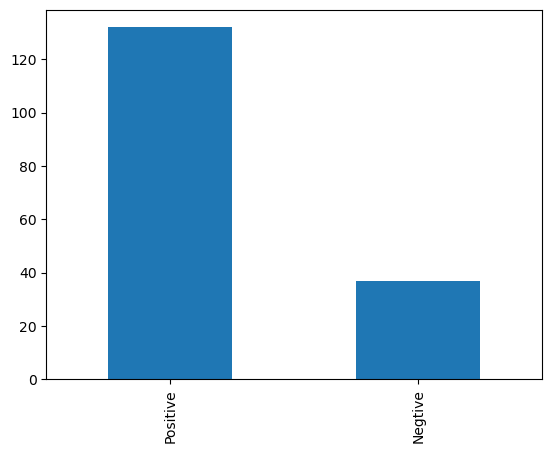

In [156]:
df_loc['Scores'].value_counts().plot.bar()

In [169]:
df=df.rename(columns={'library_facilities':'Library_Facilities'})

df.head(3)

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,Library_Facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,not satisfactory lab work must include latest ...,0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...


In [173]:
df_lib=df.iloc[:,[8,9]]

In [176]:
df_lib=df_lib.reset_index().rename({'index':id})

df_lib

,index,Library_Facilities,library_facilities
0,0,0.0,library facilities are good but number of book...
1,1,-1.0,Not good
2,2,1.0,Library facilities are excellent in terms of g...
3,3,0.0,Its the best thing i have seen in this univers...
4,4,1.0,library has huge collection of books from diff...
...,...,...,...
180,180,NaN,good
181,181,-1.0,library facilities are not good.They are not f...
182,182,1.0,They are good
183,183,1.0,We have a good library with all facalities.


In [177]:
df_lib

,index,Library_Facilities,library_facilities
0,0,0.0,library facilities are good but number of book...
1,1,-1.0,Not good
2,2,1.0,Library facilities are excellent in terms of g...
3,3,0.0,Its the best thing i have seen in this univers...
4,4,1.0,library has huge collection of books from diff...
...,...,...,...
180,180,NaN,good
181,181,-1.0,library facilities are not good.They are not f...
182,182,1.0,They are good
183,183,1.0,We have a good library with all facalities.


In [182]:
' '.join(df_lib.iloc[:,2])

"library facilities are good but number of books are less Not good  Library facilities are excellent in terms of good techniques that are used over there. Its the best thing i have seen in this university,albeit the behaviour of library staff is unprofessional at times. They are whimsically rude. library has huge collection of books from different authors Yes Hardworking I am satisfied with the facilities but few books are limited of  database distribution  Its required some libral in rules Its required some libral in rules Good Good good library facilities Library facilities are very good. No issues  Hardworking Good Excellent Good Good Again some of the faculties don't know how to behave otherwise it is good. Descent. Good Good library is very well managed and provide needed facilities to us Its required some libral in rules They are doing there job well Well... all the books are not avilable . If they are in library , books are in less number and strength of student are large. Good 

In [184]:
df_lib.columns=['id','LibraryFacilities','Lib_Facilities']

In [185]:
df_lib

,id,LibraryFacilities,Lib_Facilities
0,0,0.0,library facilities are good but number of book...
1,1,-1.0,Not good
2,2,1.0,Library facilities are excellent in terms of g...
3,3,0.0,Its the best thing i have seen in this univers...
4,4,1.0,library has huge collection of books from diff...
...,...,...,...
180,180,NaN,good
181,181,-1.0,library facilities are not good.They are not f...
182,182,1.0,They are good
183,183,1.0,We have a good library with all facalities.


In [187]:
import re

def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text  
        
        
df_lib['Text']=df_lib['Lib_Facilities'].apply(preprocessor)

In [189]:
df_lib['Text'][0]

'library facilities are good but number of books are less'

In [190]:
datas={}

for i,row in tqdm(df_lib.iterrows(),total=len(df_lib)):
    text=row['Lib_Facilities']
    indexx=row['id']
    datas[indexx]=sia.polarity_scores(text)

  0%|          | 0/185 [00:00<?, ?it/s]

In [191]:
vaders=pd.DataFrame(datas).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df_lib,on='id')

In [192]:
vaders

,id,neg,neu,pos,compound,LibraryFacilities,Lib_Facilities,Text
0,0,0.000,0.702,0.298,0.3400,0.0,library facilities are good but number of book...,library facilities are good but number of book...
1,1,0.706,0.294,0.000,-0.3412,-1.0,Not good,not good
2,2,0.000,0.645,0.355,0.7650,1.0,Library facilities are excellent in terms of g...,library facilities are excellent in terms of g...
3,3,0.214,0.644,0.142,-0.2732,0.0,Its the best thing i have seen in this univers...,its the best thing i have seen in this univers...
4,4,0.000,0.777,0.223,0.3182,1.0,library has huge collection of books from diff...,library has huge collection of books from diff...
...,...,...,...,...,...,...,...,...
180,180,0.000,0.000,1.000,0.4404,NaN,good,good
181,181,0.000,1.000,0.000,0.0000,-1.0,library facilities are not good.They are not f...,library facilities are not good they are not f...
182,182,0.000,0.408,0.592,0.4404,1.0,They are good,they are good
183,183,0.000,0.674,0.326,0.4404,1.0,We have a good library with all facalities.,we have a good library with all facalities


In [197]:
vaders['LibraryFacilities']=df_lib['LibraryFacilities'].fillna(method='ffill')

In [203]:
vaders['Scoress']=vaders['LibraryFacilities'].map({0:'Netural', -1:'Negative' ,1:'Postive'})

In [204]:
vaders

,id,neg,neu,pos,compound,LibraryFacilities,Lib_Facilities,Text,Scoress
0,0,0.000,0.702,0.298,0.3400,0.0,library facilities are good but number of book...,library facilities are good but number of book...,Netural
1,1,0.706,0.294,0.000,-0.3412,-1.0,Not good,not good,Negative
2,2,0.000,0.645,0.355,0.7650,1.0,Library facilities are excellent in terms of g...,library facilities are excellent in terms of g...,Postive
3,3,0.214,0.644,0.142,-0.2732,0.0,Its the best thing i have seen in this univers...,its the best thing i have seen in this univers...,Netural
4,4,0.000,0.777,0.223,0.3182,1.0,library has huge collection of books from diff...,library has huge collection of books from diff...,Postive
...,...,...,...,...,...,...,...,...,...
180,180,0.000,0.000,1.000,0.4404,1.0,good,good,Postive
181,181,0.000,1.000,0.000,0.0000,-1.0,library facilities are not good.They are not f...,library facilities are not good they are not f...,Negative
182,182,0.000,0.408,0.592,0.4404,1.0,They are good,they are good,Postive
183,183,0.000,0.674,0.326,0.4404,1.0,We have a good library with all facalities.,we have a good library with all facalities,Postive


In [205]:
df.head()

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,Library_Facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,not satisfactory lab work must include latest ...,0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [206]:
df_ext=df.loc[:,['extracurricular','extracurricular.1']]

df_ext

,extracurricular,extracurricular.1
0,1,extracurricular activities are excellent and p...
1,1,Good
2,1,Extra curricular activities also help students...
3,-1,Complete wastage of time. Again this opinion i...
4,1,extracurricular activities increases mental an...
...,...,...
180,1,they all are held in super
181,1,good
182,1,the extracurricular activities held in univers...
183,1,Our university has lot of extracurricular goin...


In [207]:
' '.join(df_ext['extracurricular.1'])

"extracurricular activities are excellent and provides best platform to students. Good  Extra curricular activities also help students to divert their mind from their study for some time. University plays an important role in this task. Complete wastage of time. Again this opinion is strictly personal and may not coincide with others. extracurricular activities increases mental and physical abilities Yes No views No idea about the extracurricular activities.  Good it provides a great platform Good it provides a great platform While coming to extracurriculum activities it's better than any other university which I had come around. Awesome ok This university is no1 in terms of extracurricular activities and in encouraging students to participate at their comfort levels.  Good Good Great job excellent Its give various opportunities and exposure This is really a good thing that events happen in our university regularly but they must be announced early so that every student can prepare them

In [208]:
import re

def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text  
        
        
df_ext['Text']=df_ext['extracurricular.1'].apply(preprocessor)

In [213]:
df_ext=df_ext.reset_index().rename(columns={'index':'id'})

In [214]:
dataing={}

for i,row in tqdm(df_ext.iterrows(),total=len(df_ext)):
    text=row['Text']
    indexing=row['id']
    dataing[indexing]=sia.polarity_scores(text)

  0%|          | 0/185 [00:00<?, ?it/s]

In [217]:
vaders=pd.DataFrame(dataing).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df_ext,on='id')

In [218]:
vaders

,id,neg,neu,pos,compound,extracurricular,extracurricular.1,Text
0,0,0.0,0.503,0.497,0.8360,1,extracurricular activities are excellent and p...,extracurricular activities are excellent and p...
1,1,0.0,0.000,1.000,0.4404,1,Good,good
2,2,0.0,0.764,0.236,0.6705,1,Extra curricular activities also help students...,extra curricular activities also help students...
3,3,0.0,1.000,0.000,0.0000,-1,Complete wastage of time. Again this opinion i...,complete wastage of time again this opinion is...
4,4,0.0,0.750,0.250,0.2500,1,extracurricular activities increases mental an...,extracurricular activities increases mental an...
...,...,...,...,...,...,...,...,...
180,180,0.0,0.562,0.438,0.5994,1,they all are held in super,they all are held in super
181,181,0.0,0.000,1.000,0.4404,1,good,good
182,182,0.0,0.586,0.414,0.7474,1,the extracurricular activities held in univers...,the extracurricular activities held in univers...
183,183,0.0,0.822,0.178,0.3818,1,Our university has lot of extracurricular goin...,our university has lot of extracurricular goin...


In [219]:
df_ext['extracurricular'].value_counts()

 1    154
 0     19
-1     12
Name: extracurricular, dtype: int64

In [222]:
vaders['Score']=df_ext['extracurricular'].map({1:'Postive',-1:'Negative',0:'Neutral'})

In [223]:
vaders

,id,neg,neu,pos,compound,extracurricular,extracurricular.1,Text,Score
0,0,0.0,0.503,0.497,0.8360,1,extracurricular activities are excellent and p...,extracurricular activities are excellent and p...,Postive
1,1,0.0,0.000,1.000,0.4404,1,Good,good,Postive
2,2,0.0,0.764,0.236,0.6705,1,Extra curricular activities also help students...,extra curricular activities also help students...,Postive
3,3,0.0,1.000,0.000,0.0000,-1,Complete wastage of time. Again this opinion i...,complete wastage of time again this opinion is...,Negative
4,4,0.0,0.750,0.250,0.2500,1,extracurricular activities increases mental an...,extracurricular activities increases mental an...,Postive
...,...,...,...,...,...,...,...,...,...
180,180,0.0,0.562,0.438,0.5994,1,they all are held in super,they all are held in super,Postive
181,181,0.0,0.000,1.000,0.4404,1,good,good,Postive
182,182,0.0,0.586,0.414,0.7474,1,the extracurricular activities held in univers...,the extracurricular activities held in univers...,Postive
183,183,0.0,0.822,0.178,0.3818,1,Our university has lot of extracurricular goin...,our university has lot of extracurricular goin...,Postive
